### example of QCL structure


In [ ]:
import meep as mp
import numpy as np

resolution = 50
sx = 12
sy = 5
cell = mp.Vector3(sx, sy, 0)
pml_layers = [mp.PML(1.0)]

# 各层厚度（单位：μm）
padge_thickness = 0.08
ngaas_thickness = 0.1
ti_thickness = 0.02
au_thickness = 0.18
core_thickness = 2.5
substrate_thickness = 1.0

# 材料定义（近似 ε = n^2）
si_gaas = mp.Medium(epsilon=12.9)
qcl_core = mp.Medium(epsilon=13.0)
ngaas = mp.Medium(epsilon=12.5)
pdge = mp.Medium(epsilon=10.0)
ti = mp.Medium(epsilon=6.0)
au = mp.Medium(epsilon=9.5)

geometry = []

# Substrate
geometry.append(mp.Block(
    material=si_gaas,
    size=mp.Vector3(mp.inf, substrate_thickness),
    center=mp.Vector3(y=-sy/2 + substrate_thickness/2)
))

# QCL active region
geometry.append(mp.Block(
    material=qcl_core,
    size=mp.Vector3(mp.inf, core_thickness),
    center=mp.Vector3(y=-sy/2 + substrate_thickness + core_thickness/2)
))

# 上层金属叠层
y0 = -sy/2 + substrate_thickness + core_thickness
geometry += [
    mp.Block(material = pdge, size = mp.Vector3(mp.inf, padge_thickness), center = mp.Vector3(y=y0 + padge_thickness/2)),
    mp.Block(material = ngaas, size = mp.Vector3(mp.inf, ngaas_thickness), center = mp.Vector3(y=y0 + padge_thickness + ngaas_thickness/2)),
    mp.Block(material = ti, size = mp.Vector3(mp.inf, ti_thickness), center = mp.Vector3(y=y0 + padge_thickness + ngaas_thickness + ti_thickness/2)),
    mp.Block(material = au, size = mp.Vector3(mp.inf, au_thickness), center = mp.Vector3(y=y0 + padge_thickness + ngaas_thickness + ti_thickness + au_thickness/2))
]


# Source
sources = [mp.Source(
    src=mp.GaussianSource(frequency=1/0.1, fwidth=0.2),
    component=mp.Ez,
    center=mp.Vector3(-3, -sy/2 + 0.5),
    size=mp.Vector3(0, 1.0)
)]

tran_fr = mp.FluxRegion(center=mp.Vector3(6))
frequencies = np.linspace(10,10,100)

# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2
)

sim.plot2D()


### QCL material structure


     block, center = (0,-2.5,0)
          size (70,30,12)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.9,12.9,12.9)
     block, center = (0,-2.465,0)
          size (70,0.07,12)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.5,12.5,12.5)
     block, center = (0,-2.46443,0)
          size (70,0.00113,12)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     block, center = (0,-2.46387,0)
          size (70,0.00113,12)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     block, center = (0,-2.45931,0)
          size (70,0.008,12)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.5,12.5,12.5)
     block, center = (0,-2.45431,0)
          size (70,0.01,12)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10,

<Axes: xlabel='X', ylabel='Y'>

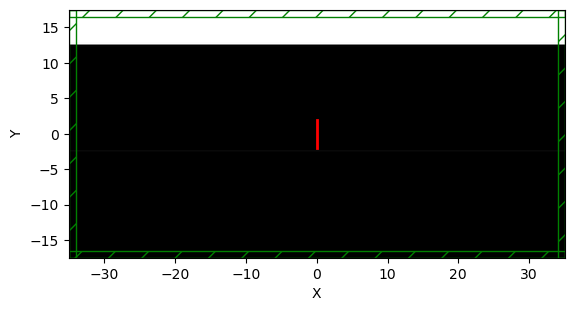

In [2]:
import meep as mp
import numpy as np

# 各层厚度（单位：μm）
resolution = 50
sx = 70
sy = 35
sz = 12
cell = mp.Vector3(sx, sy, 0)
pml_layers = [mp.PML(1)]

# 各层厚度（单位：μm）
au_thickness = 0.018
ti_thickness = 0.002
pdge_thickness = 0.01
ngaas_thickness_1 = 0.008
Ar_thickness = 0.00113

ngaas_thickness_2 = 0.07
sigaas_thickness = 30

# 材料定义（近似 ε = n^2）
au = mp.Medium(epsilon=9.5)
ti = mp.Medium(epsilon=6.0)
pdge = mp.Medium(epsilon=10.0)
ngaas = mp.Medium(epsilon=12.5)
Ar = mp.Medium(epsilon=13.0)
si_gaas = mp.Medium(epsilon=12.9,)

geometry = []

# Substrate
geometry.append(mp.Block(
                    material=si_gaas,
                    size=mp.Vector3(sx, sigaas_thickness,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness/2)))

geometry.append(mp.Block(
                    material=ngaas,
                    size=mp.Vector3(sx, ngaas_thickness_2,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness/2 + ngaas_thickness_2/2)))

# QCL active region
geometry.append(mp.Block(
                    material=Ar,
                    size=mp.Vector3(sx, Ar_thickness,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness/2 + ngaas_thickness_2/2 + Ar_thickness/2)))

# 上层金属叠层
y0 = -sy/2 + sigaas_thickness/2 + ngaas_thickness_2/2 + Ar_thickness/2
geometry += [
    mp.Block(material = Ar,  
             size = mp.Vector3(sx, Ar_thickness,sz), 
             center = mp.Vector3(y=y0 + Ar_thickness/2)),
    mp.Block(material = ngaas, 
             size = mp.Vector3(sx, ngaas_thickness_1,sz), 
             center = mp.Vector3(y=y0 + Ar_thickness + ngaas_thickness_1/2)),
    mp.Block(material = pdge,    
             size = mp.Vector3(sx, pdge_thickness,sz),    
             center = mp.Vector3(y=y0 + Ar_thickness + ngaas_thickness_1/2 + pdge_thickness/2)),
    mp.Block(material = ti,    
             size = mp.Vector3(sx, ti_thickness,sz),    
             center = mp.Vector3(y=y0 + Ar_thickness + ngaas_thickness_1/2 + pdge_thickness/2 + ti_thickness/2)),
    mp.Block(material = au,    
             size = mp.Vector3(sx, au_thickness,sz),    
             center = mp.Vector3(y=y0 + Ar_thickness + ngaas_thickness_1/2 + pdge_thickness/2 + ti_thickness/2 + au_thickness/2))
]
    
# Source
sources = [mp.Source(
    src=mp.GaussianSource(frequency=1/0.1, fwidth=0.2),
    component=mp.Ez,
    center=mp.Vector3(0,0,0),
    size=mp.Vector3(0,4.0,0))]

# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2
)


sim.plot2D()

### Grating structure


     block, center = (0,-2.5,0)
          size (12,5,30)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.9,12.9,12.9)
     block, center = (-4.5,0,0)
          size (0.1,5,30)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-4,0,0)
          size (0.1,5,30)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-3.75,0,0)
          size (0.1,5,30)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-3.25,0,0)
          size (0.1,5,30)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-2.75,0,0)
          size (0.1,5,30)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-2.5,0,0)
          size (0.1,5,3

<Axes: xlabel='X', ylabel='Y'>

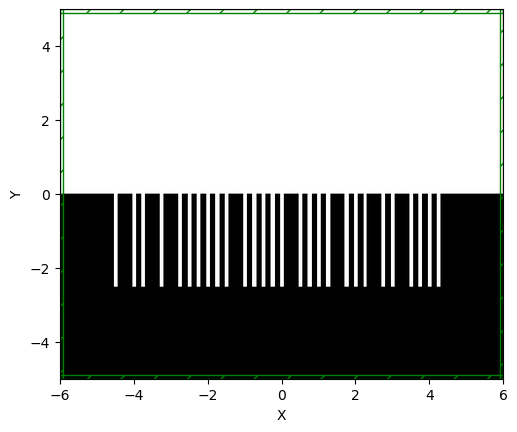

In [5]:
import meep as mp

resolution = 50
sx = 12
sy = 10
sz = 30
cell = mp.Vector3(sx,sy,0)
pml_layers = [mp.PML(0.1)]

# 各层厚度（单位：μm）
sigaas_thickness = 5

# 材料定义（近似 ε = n^2）
si_gaas = mp.Medium(epsilon=12.9)

geometry = []

# Substrate
geometry.append(mp.Block(
                    material=si_gaas,
                    size=mp.Vector3(sx, sigaas_thickness,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness/2)))

# 光栅参数
Λ = 0.5                    # 基本周期（μm）
slot_width = 0.1           # 槽宽（沿 X）
slot_depth = 5           # 镂刻深度（沿 Y）
slot_spacing = Λ / 2       # 间距
pattern = "|-||-|-||||||-|||||-||||-|||-||-||||"  # 狭缝排列样式

# 起始 X 位置，居中布置
x_start = -len(pattern) * slot_spacing / 2

# 放置高度（y 方向中心）
y_grating = sy - slot_depth / 2 

# 光栅 geometry 列表
grating_geometry = []

# 构造光栅槽
for i, symbol in enumerate(pattern):
    if symbol == "|":
        x_pos = x_start + i * slot_spacing
        grating_geometry.append(mp.Block(
            material=mp.air,
            size=mp.Vector3(slot_width, slot_depth, sz),
            center=mp.Vector3(x_pos)
        ))

geometry += grating_geometry

sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    dimensions=2
)

sim.plot2D()

### combine them


     block, center = (0,-2.5,0)
          size (70,30,12)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.9,12.9,12.9)
     block, center = (0,12.535,0)
          size (70,0.07,12)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.5,12.5,12.5)
     block, center = (0,12.5706,0)
          size (70,0.00113,12)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     block, center = (0,12.5717,0)
          size (70,0.00113,12)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     block, center = (0,12.5763,0)
          size (70,0.008,12)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12.5,12.5,12.5)
     block, center = (0,12.5853,0)
          size (70,0.01,12)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (10,10,1

<Axes: xlabel='X', ylabel='Y'>

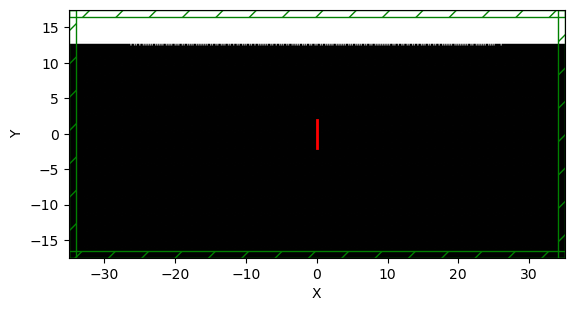

In [ ]:
import meep as mp
import numpy as np

# basic setup (0.1 μm)
resolution = 100
sx = 70
sy = 35
sz = 12
cell = mp.Vector3(sx, sy, 0)
pml_layers = [mp.PML(1)]

# thickness of different layers（0.1 μm）
au_thickness = 0.018
ti_thickness = 0.002
pdge_thickness = 0.01
ngaas_thickness_1 = 0.008
Ar_thickness = 0.00113

ngaas_thickness_2 = 0.07
sigaas_thickness = 30

# material definition
au = mp.Medium(epsilon=9.5)
ti = mp.Medium(epsilon=6.0)
pdge = mp.Medium(epsilon=10.0)
ngaas = mp.Medium(epsilon=12.5)
Ar = mp.Medium(epsilon=13.0)
si_gaas = mp.Medium(epsilon=12.9,)

geometry = []

# Substrate
geometry.append(mp.Block(
                    material=si_gaas,
                    size=mp.Vector3(sx, sigaas_thickness,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness/2)))

geometry.append(mp.Block(
                    material=ngaas,
                    size=mp.Vector3(sx, ngaas_thickness_2,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness + ngaas_thickness_2/2)))

# QCL active region
geometry.append(mp.Block(
                    material=Ar,
                    size=mp.Vector3(sx, Ar_thickness,sz),
                    center=mp.Vector3(y= -sy/2 + sigaas_thickness + ngaas_thickness_2 + Ar_thickness/2)))

# upper layers
y0 = -sy/2 + sigaas_thickness + ngaas_thickness_2 + Ar_thickness
geometry += [
    mp.Block(material = Ar,  
             size = mp.Vector3(sx, Ar_thickness,sz), 
             center = mp.Vector3(y = y0 + Ar_thickness/2)),
    mp.Block(material = ngaas, 
             size = mp.Vector3(sx, ngaas_thickness_1,sz), 
             center = mp.Vector3(y = y0 + Ar_thickness + ngaas_thickness_1/2)),
    mp.Block(material = pdge,    
             size = mp.Vector3(sx, pdge_thickness,sz),    
             center = mp.Vector3(y = y0 + Ar_thickness + ngaas_thickness_1 + pdge_thickness/2)),
    mp.Block(material = ti,    
             size = mp.Vector3(sx, ti_thickness,sz),    
             center = mp.Vector3(y = y0 + Ar_thickness + ngaas_thickness_1 + pdge_thickness + ti_thickness/2)),
    mp.Block(material = au,    
             size = mp.Vector3(sx, au_thickness,sz),    
             center = mp.Vector3(y = y0 + Ar_thickness + ngaas_thickness_1 + pdge_thickness + ti_thickness + au_thickness/2))
]
    
# grating parameters
Λ = 0.5                    # 基本周期（0.1μm）
slot_length = 10
slot_width = 0.1        
slot_depth = 0.5       
slot_spacing = Λ / 2
pattern_1 = "|-||-|-||||||-|||||-||||-|||-||-||||"  # 狭缝排列样式
pattern_2 = "-|||||||-||-||-|||-||-|-||-|||-||-|-||||||-||-|-|||-||-|||||-|||"
pattern_3 = "-||-||-||-|||||-||||||-|||-||||-||-||-|||||||||-||-|-||-||-||-|-|||-||-||-|-||||||-||||||||-||-||||||-||||---|"
pattern = pattern_1 + pattern_2 + pattern_3


x_start = -len(pattern) * slot_spacing / 2
y_grating = y0 + Ar_thickness + ngaas_thickness_1 + pdge_thickness + ti_thickness + au_thickness/2

# grating list
grating_geometry = []

# setup grating list
for i, symbol in enumerate(pattern):
    if symbol == "|":
        x_pos = x_start + i * slot_spacing
        grating_geometry.append(mp.Block(
                                material=mp.air,
                                size=mp.Vector3(slot_width, slot_depth, sz),
                                center=mp.Vector3(x_pos,y_grating,0)
        ))

# add to original layers
geometry += grating_geometry

# Source
sources = [mp.Source(
    src=mp.GaussianSource(frequency=1/0.1, fwidth=0.2),
    component=mp.Ez,
    center=mp.Vector3(0,0,0),
    size=mp.Vector3(0,4.0,0))]

# Simulation setup
sim = mp.Simulation(
    cell_size=cell,
    resolution=resolution,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    dimensions=2
)

sim.plot2D()